<a href="https://colab.research.google.com/github/dianamindroc/smlm/blob/master/Intro_and_data_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Single-molecule localization microscopy (SMLM)**
Single Molecule Localization Microscopy (SMLM) is a type of super-resolution microscopy technique that allows for imaging of structures in biological samples at resolutions beyond the diffraction limit of conventional light microscopy. The diffraction limit typically restricts the resolution of conventional light microscopy to about 200-300 nm in the lateral (xy) dimension and 500-700 nm in the axial (z) dimension. SMLM techniques can achieve resolutions of 10-20 nm, which is a significant improvement. [[1]]( https://doi.org/10.1038/s43586-021-00038-x)

In SMLM techniques, it's essential for the molecules to be fluorescently labeled. For an optimal SMLM experiment, the fluorescent labeling approach should maintain the function, position, and count of the target molecules. Moreover, each target molecule should be marked with a single, compact-sized fluorophore. Fluorophores used in SMLM can be categorized into five groups based on their switching mechanisms between ON and OFF states. These categories encompass both synthetic dyes and fluorescent proteins. Typically, synthetic dyes offer higher photon counts than fluorescent proteins, leading to reduced imaging durations and enhanced localization accuracy. On the other hand, fluorescent proteins are more apt for live-cell studies, but their effectiveness might be compromised by early bleaching or insufficient labeling, potentially affecting the resolution of structures. The microscope captures images of the sparsely activated fluorescent molecules. These appear as isolated diffraction-limited spots.
Thousands to millions of frames are captured, with different subsets of molecules being activated in each frame.

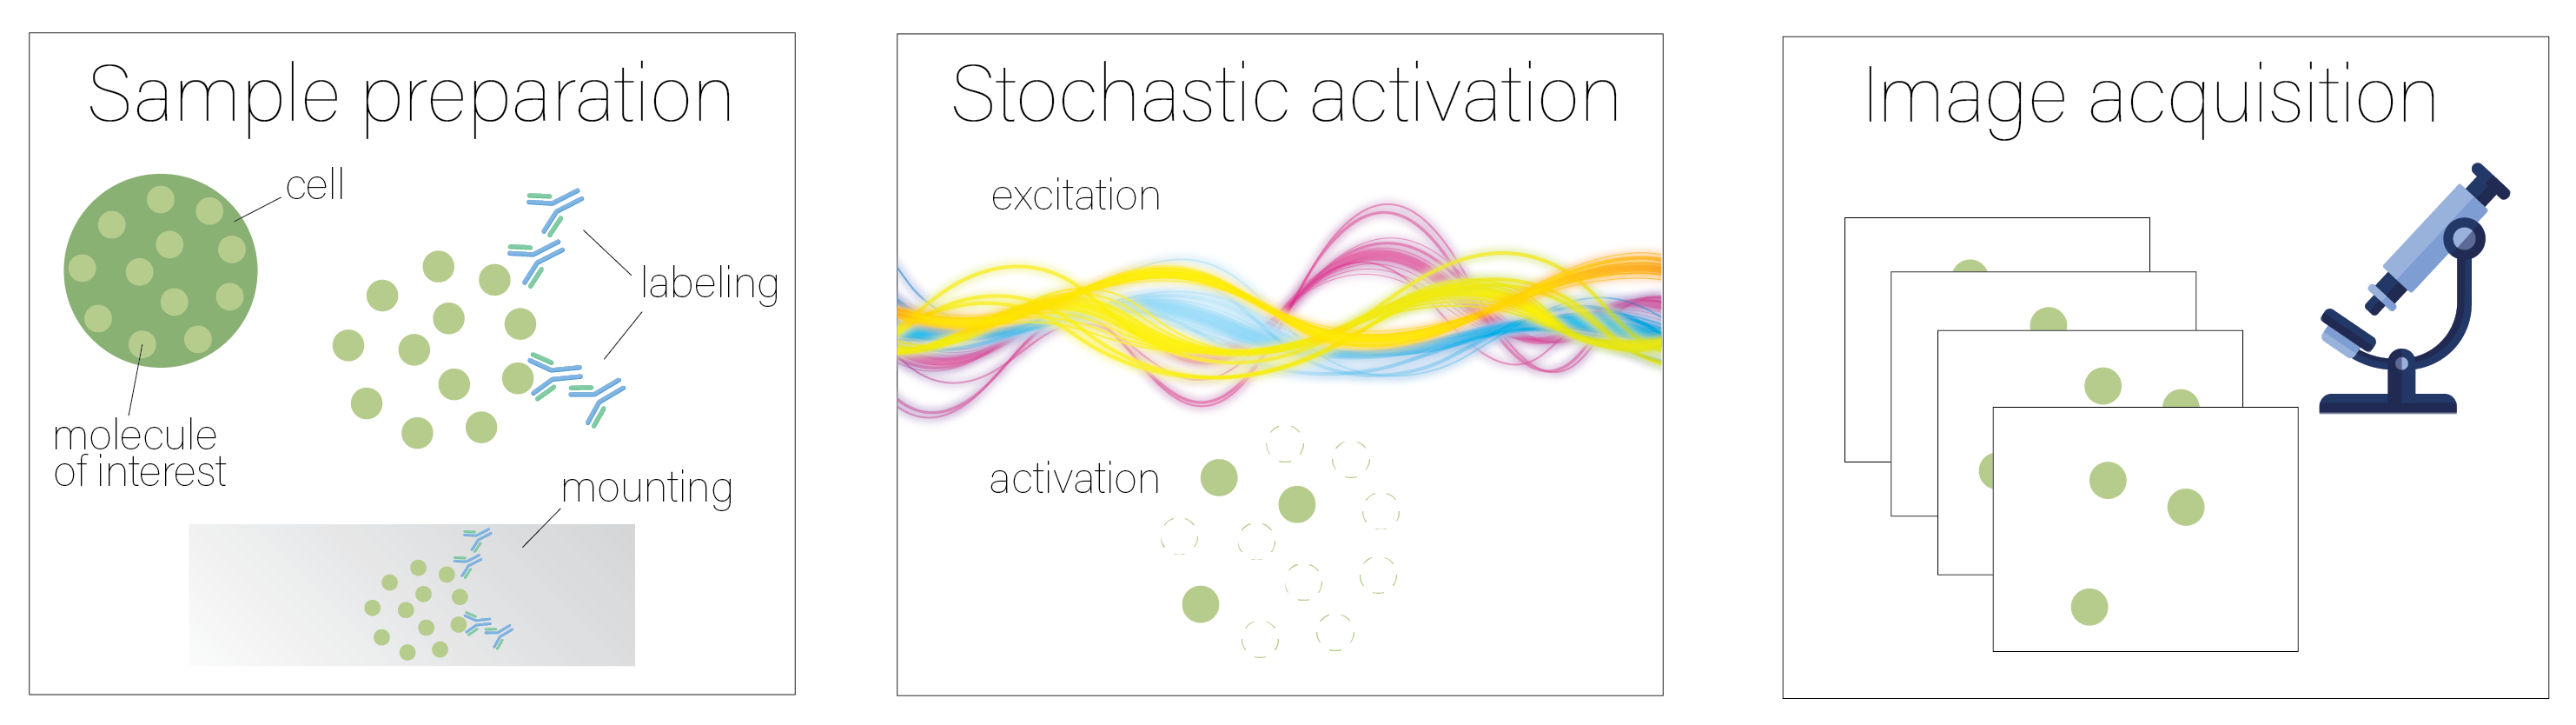

For each diffraction-limited spot in the acquired images, the center position is determined with nanometer precision.
This is achieved by fitting the spot's intensity profile to a mathematical model, typically a 2D Gaussian function. The precise positions of the localized molecules from all the frames are accumulated.
These positions are used to reconstruct a super-resolved image, where each localized molecule contributes to a pixel or a small group of pixels in the final image. The accumulated positions of the molecules are used to generate a high-resolution image that reveals structures and details beyond the diffraction limit of conventional microscopy.
Various software tools can be used for this reconstruction, and they often provide options for visualization, such as color-coding based on molecule density or z-position. The super-resolved image is analyzed to extract biological insights.
Measurements such as distances between structures, molecule densities, and cluster sizes can be derived from the image.

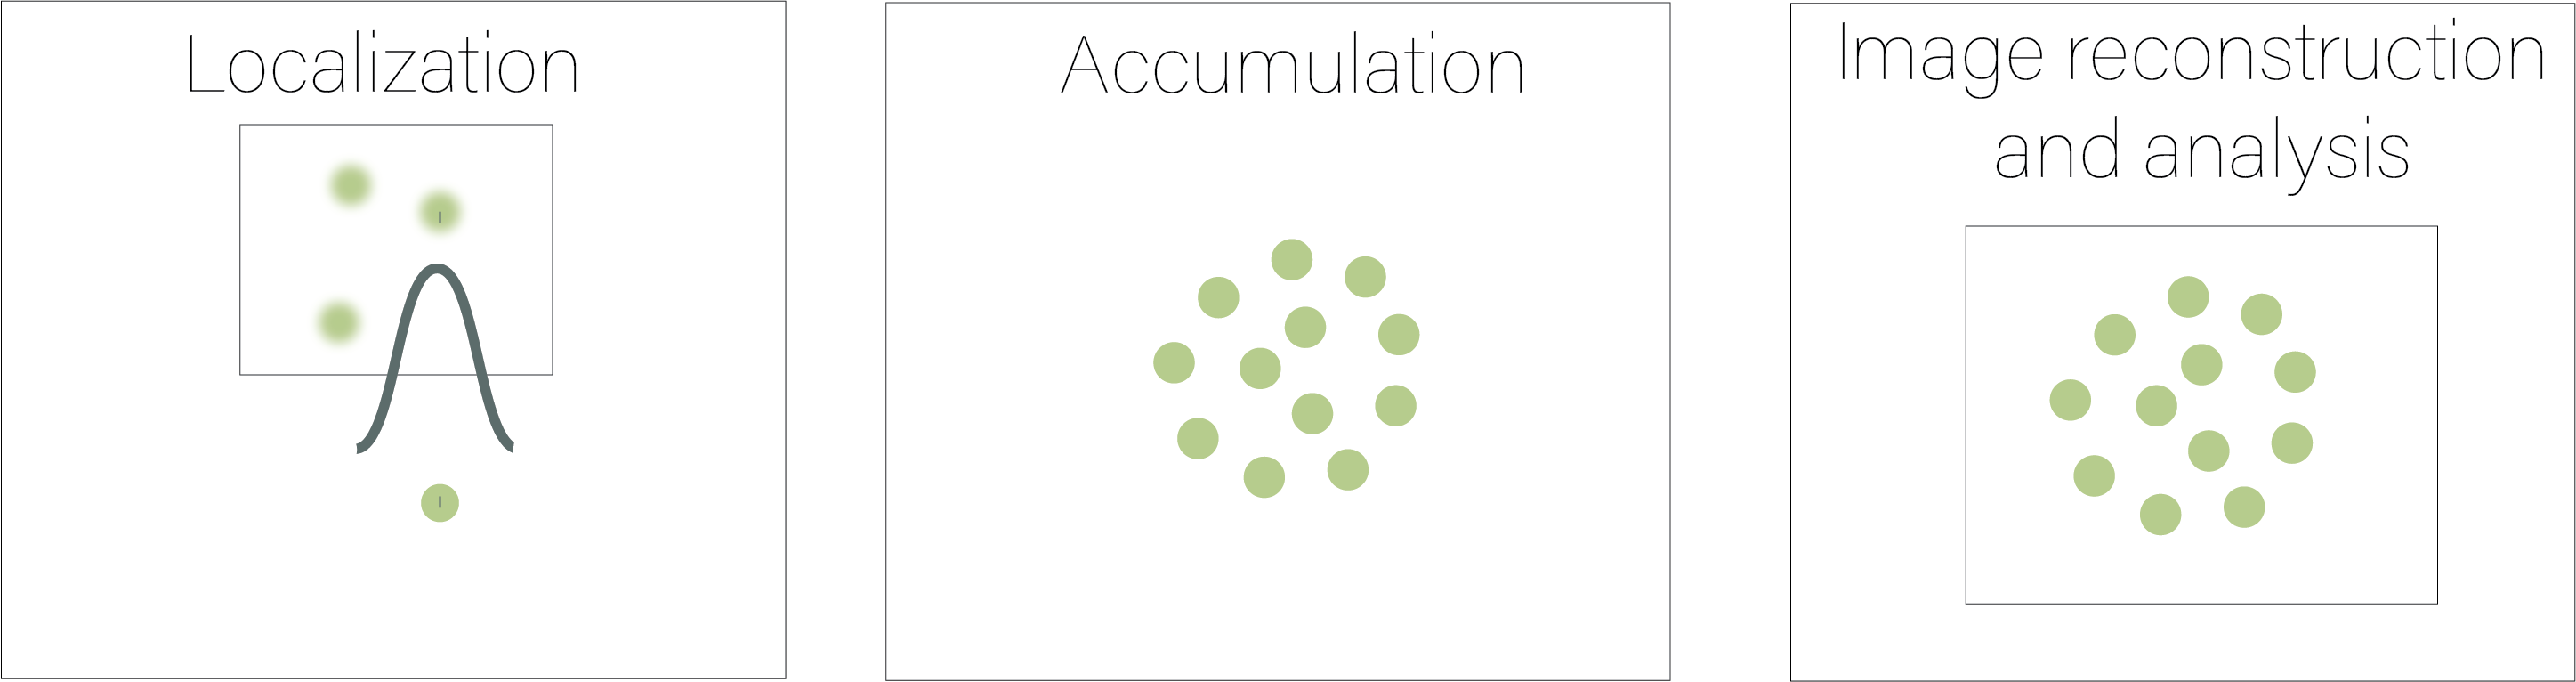

# **Expansion microscopy (ExM)**

Expansion microscopy (ExM) is a microscopy method that physically magnifies biological specimens. It was developed to allow researchers to obtain super-resolution images using conventional microscopes. [[3]](https://www.nature.com/articles/s41592-018-0219-4)

# **ExM and SMLM**
Combining expansion microscopy (ExM) with single-molecule localization microscopy (SMLM) offers a powerful approach to achieve unprecedented resolution in imaging biological specimens. By first physically expanding a specimen with ExM and then applying the high-resolution capabilities of SMLM, we can visualize intricate molecular structures with even greater detail than using either technique alone. This synergy allows for the potential visualization of individual molecules within densely packed cellular environments. However, while the combined approach enhances resolution, it also inherits challenges from both techniques. The expansion process can introduce artifacts or distortions, and the accuracy of molecule localization in SMLM can be affected by factors such as the density of fluorescent labels and photoblinking. Moreover, the combination might exacerbate discrepancies in the evenness of expansion across different biological molecules. Nonetheless, when optimized, combining ExM and SMLM offers a promising frontier in super-resolution microscopy.

# **DNA-origami**

DNA origami [[2]](https://www.nature.com/articles/s43586-020-00009-8) is a technique in nanotechnology where DNA molecules are folded into specific shapes and structures. The term "origami" is borrowed from the Japanese art of paper folding to describe the way DNA is folded to create these shapes.

1. Basis of DNA Origami: The basic principle of DNA origami is based on the specific pairing of DNA bases: adenine (A) with thymine (T) and cytosine (C) with guanine (G). By designing specific sequences of DNA, it can be ensured that certain parts of the DNA strand will bind to one another in predictable ways.

2. Staple and Scaffold Strands: The technique uses a long, single-stranded "scaffold" DNA, typically derived from a viral genome, and numerous shorter "staple" strands. The staple strands are designed to bind to specific portions of the scaffold strand, causing it to fold into a desired shape.

3. Shapes and Structures: Using DNA origami, a wide variety of two-dimensional (2D) and three-dimensional (3D) shapes can be created, including triangles, rectangles, cubes, and more complex structures. These can be visualized using techniques like atomic force microscopy (AFM) or transmission electron microscopy (TEM).

4. Functionalization: Beyond just creating shapes, DNA origami can be functionalized by attaching other molecules to them. This can include proteins, nanoparticles, or other functional groups. This makes DNA origami a powerful tool for creating nanoscale devices and systems.

5. Applications: The potential applications of DNA origami are vast. They include drug delivery (where the DNA structure carries a therapeutic payload), nanoscale robotics, molecular computing, and as templates for the assembly of other materials.

## DNA-origami as 'ground truth' data for training deep learning networks

In the realm of biology and microscopy, obtaining ground truth data is often a challenging, if not impossible, endeavor due to the complex and dynamic nature of biological processes. However, DNA-origami stands as an exception. Given its predictable and programmable nature, when DNA origami structures are designed, the ground truth information about the intended configuration is inherently available. This is a significant advantage especially when training deep learning networks, as any predictions or classifications made by deep learning models can be directly compared to the actual design, ensuring precise evaluation of model accuracy.

# **Repository cloning and installation**

Before we proceed, let's clone the project repository so that we can use for further experimentation.

In [2]:
!git clone https://github.com/dianamindroc/smlm.git

Cloning into 'smlm'...
remote: Enumerating objects: 557, done.
remote: Counting objects: 100% (391/391), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 557 (delta 234), reused 285 (delta 148), pack-reused 166
Receiving objects: 100% (557/557), 172.52 KiB | 1.51 MiB/s, done.
Resolving deltas: 100% (295/295), done.


In [1]:
!pip install ./smlm
!pip install numpy --upgrade

Processing ./smlm
  Preparing metadata (setup.py) ... done
  Created wheel for SMLM-Simulator: filename=SMLM_Simulator-0.1-py3-none-any.whl size=42941 sha256=f611c872c116d7eef83f6ec2449c33eba0620ba67392a6b4f409f8c532d8ba22
  Stored in directory: /tmp/pip-ephem-wheel-cache-76f3917h/wheels/b3/eb/6d/68cdf5265ba0e02324d191404f57aab16afc88352dc8c5addc
Successfully built SMLM-Simulator
  Attempting uninstall: SMLM-Simulator
    Found existing installation: SMLM-Simulator 0.1
    Uninstalling SMLM-Simulator-0.1:
      Successfully uninstalled SMLM-Simulator-0.1


# **Data simulation**

To make SMLM simulations as realistic as possible, multiple steps have to be taken into consideration:

1. **Define Origami Structures:**
   - **Shapes:** Define a variety of DNA origami shapes you want to simulate, such as 2D shapes, 3D boxes, tubes, etc.
   - **Features:** Include various structural features like corners, edges, surfaces, and internal compartments.
   - **Sizes:** Consider different sizes and scales of origami structures.

2. **Determine Dye Placement:**
   - **Strategic Placement:** Place fluorescent dyes at strategic locations on the origami structures depending on what features you want to capture, such as corners, edges, surfaces, etc.
   - **Random Variability:** Introduce variability in dye placement to simulate real-world imperfections and variabilities.

3. **Simulate Localization Points:**
   - **Point Clouds:** Generate point clouds representing the locations of the fluorescent dyes.
   - **Resolution:** Consider the resolution of SMLM and simulate points accordingly.
   - **Noise:** Introduce noise, such as Gaussian noise, to simulate the uncertainty in localization.

4. **Introduce Distortions and Incompleteness:**
   - **Missing Points:** Randomly remove points from the point clouds to simulate incompleteness.
   - **Distortions:** Introduce distortions to the point clouds, such as stretching, shrinking, or warping, to simulate distortions in real data.
   - **Outliers:** Add outlier points to simulate artifacts and imperfections in the data.

5. **Simulate Imaging Conditions:**
   - **Photobleaching:** Simulate the effects of photobleaching by reducing the number of points over time.
   - **Background Noise:** Add background noise points to simulate the presence of non-specific signals.
   - **Density Variations:** Vary the density of points to simulate different imaging conditions and dye concentrations.

6. **Generate Labels:**
   - **Ground Truth:** Create labeled data representing the true, undistorted, and complete structures as the ground truth.
   - **Distorted Versions:** Pair the ground truth with the distorted and incomplete versions as input-output pairs for training the model.

7. **Augment Data:**
   - **Transformations:** Apply transformations like rotation, scaling, and translation to augment the data and improve the model’s generalization.
   - **Variability:** Introduce variability in dye intensities, background levels, and noise levels to simulate different imaging conditions.


Let's try it out.

We can first define some dye properties:

In [6]:
dye_properties_dict = {
        'Alexa_Fluor_647': {'density_range': (10, 50),
                            'blinking_times_range': (10, 50),
                            'intensity_range': (500, 5000),
                            'precision_range': (0.5, 2.0)},
        # ... (other dyes)
    }
# we also set the selected dye that we want to work with
selected_dye_properties = dye_properties_dict['Alexa_Fluor_647']

We will then import and define some necessary data transforms that are already defined in the repository. We need to perform padding on the point clouds so that they are all the same size; this is required for creating batches that are fed into the network, where all the data has to be of the same size. For this purpose, we need to know the highest shape in the dataset - we have a function which can search for this or we can input manually. Let's input it manually for now.
 We can also already transform the data to tensor, the format that is needed for neural networks.

In [3]:
from torchvision import transforms
from model_architectures.transforms import ToTensor, Padding
#from helpers.data import get_highest_shape
transforms_ = transforms.Compose([Padding(500), ToTensor()])

We are now ready to simulate a dataset. We first import the class.

In [4]:
from dataset.SMLMSimulator import DNAOrigamiSimulator

We will simulate an entire DNA-origami **box** dataset for deep learning training. We use the _augment_ argument for augmenting our data with rotations and the _remove corners_ argument for removing some of the corners of the simulated boxes. We want to be able to reconstruct the full ones from the incomplete ones i.e. the ones with removed corners.

In [7]:
dataset = DNAOrigamiSimulator(50, 'box', selected_dye_properties,
                                        augment=True,
                                        remove_corners=True,
                                        transform=transforms_)

Let's see how they look like.

In [24]:
# We first get one sample (and transform it to numpy array for plotting)
test_pc = next(iter(dataset))
ground_truth = test_pc[0]
simulated_with_all_corners = test_pc[1].detach().cpu().numpy()[0]
simulated_with_removed_corners = test_pc[2].detach().cpu().numpy()[0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


We then define an interactive plotting function for the notebooks and visualize the ground truth, simulated with corners and simulated with removed corners data.

In [50]:
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def plot_point_clouds(point_cloud_list, titles):
# Create a subplot layout with 1 row and 3 columns
  x1 = point_cloud_list[0][:, 0]
  y1 = point_cloud_list[0][:, 1]
  z1 = point_cloud_list[0][:, 2]
  x2 = point_cloud_list[1][:, 0]
  y2 = point_cloud_list[1][:, 1]
  z2 = point_cloud_list[1][:, 2]
  x3 = point_cloud_list[2][:, 0]
  y3 = point_cloud_list[2][:, 1]
  z3 = point_cloud_list[2][:, 2]
  fig = make_subplots(rows=1, cols=3,
                      specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}, {'type': 'scatter3d'}]])

  # First subplot
  trace1 = go.Scatter3d(x=x1, y=y1, z=z1, mode='markers',
                        marker=dict(size=10, opacity=0.8),
                        name=titles[0], showlegend=True)
  fig.add_trace(trace1, row=1, col=1)

  # Second subplot
  trace2 = go.Scatter3d(x=x2, y=y2, z=z2, mode='markers',
                        marker=dict(size=10, opacity=0.8),
                        name=titles[1], showlegend=True)
  fig.add_trace(trace2, row=1, col=2)

  # Third subplot
  trace3 = go.Scatter3d(x=x3, y=y3, z=z3, mode='markers',
                        marker=dict(size=10, opacity=0.8),
                        name=titles[2], showlegend=True)
  fig.add_trace(trace3, row=1, col=3)

  # Add titles using annotations
  annotations = [
      dict(text=titles[0], x=0.15, y=0.95, showarrow=False, xref="paper", yref="paper", font=dict(size=15)),
      dict(text=titles[1], x=0.5, y=0.95, showarrow=False, xref="paper", yref="paper", font=dict(size=15)),
      dict(text=titles[2], x=0.85, y=0.95, showarrow=False, xref="paper", yref="paper", font=dict(size=15))
  ]

  # Update the layout to add titles and remove space between plots
  fig.update_layout(
      scene_aspectmode='cube',
      annotations=annotations
  )

  iplot(fig)

In [51]:
plot_point_clouds([ground_truth, simulated_with_all_corners, simulated_with_removed_corners],['Ground Truth','With corners','Without corners'])